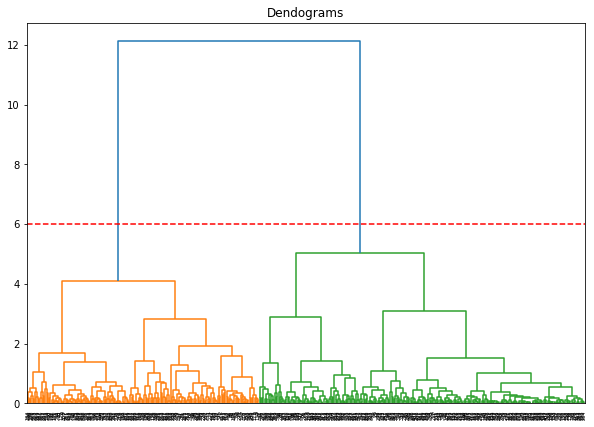

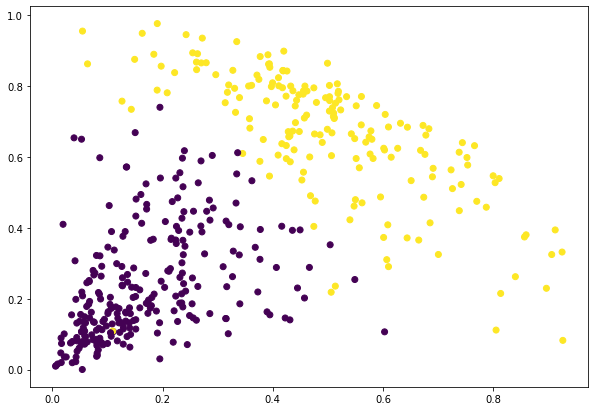

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv('Wholesale customers data.csv')
data.head()

data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
plt.figure(figsize=(10,7))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage='ward')
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

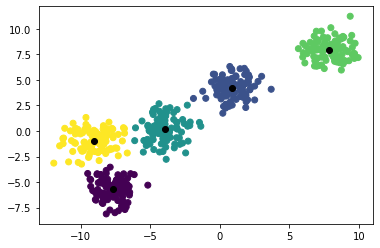

In [10]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x,y = make_blobs(n_samples=500, centers=5, n_features=2, random_state=3,)
kmean=KMeans(n_clusters=5)
kmean.fit(x)
center = kmean.cluster_centers_
y_pred = kmean.labels_


plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.scatter(center[:, 0], center[:, 1], color="black")
plt.show()





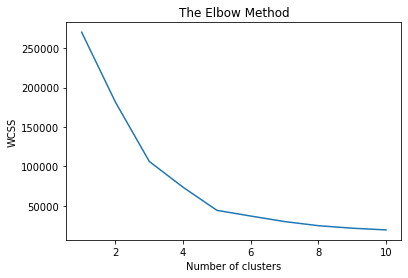

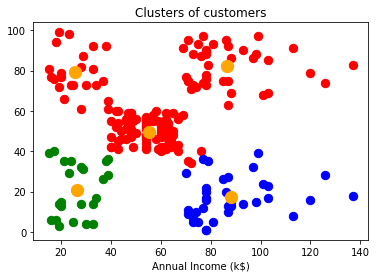

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('question4.csv')
X = dataset.iloc[:, [3,4]].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state =42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=70, c='red', label='Target')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=70, c='blue', label='Motivate')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=70, c='green', label='Discount')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=70, c='red', label='Fans')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=70, c='red', label='Casual')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 150, c = 'orange', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.show()

